In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK

In [ ]:
#Vamos a realizar una estructura basica de convnet
inputs = LK.Input(shape=(32,32,3))
conv1 = LK.Conv2D(8, (5,5),padding='valid',activation='relu')(inputs)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,(5,5), padding='valid',activation='relu')(pool1)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool2)

FC1 = LK.Dense(120,activation='relu')(flat)
FC2 =LK.Dense(84,activation='relu')(FC1)
outputs = LK.Dense(10,activation='softmax')(FC2)
modelo = MK.Model(inputs, outputs)



In [ ]:
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0     

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [ ]:
print("Tenemos  {0} imagenes de entrenamiento con {1} etiquetas".format(x_train.shape, y_train.shape) )
print("Tenemos  {0} imagenes de validacion con {1} etiquetas".format(x_test.shape, y_test.shape) )

Tenemos  (60000, 28, 28) imagenes de entrenamiento con (60000,) etiquetas
Tenemos  (10000, 28, 28) imagenes de validacion con (10000,) etiquetas


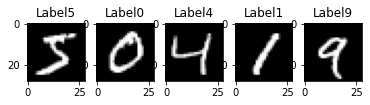

In [ ]:
#Vamos a mirar que imagenes se obtienen de esos dataset
from matplotlib import pyplot as plt 
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.gca().set_title('Label' + str(y_train[i]))
plt.show()

In [ ]:
#Vamos a normalizar las imagenes
#Vamos a hacer un reshape para que coincida con el tensor de entrada a la red
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print("Tenemos  {0} imagenes de entrenamiento con {1} etiquetas".format(x_train.shape, y_train.shape) )
print("Tenemos  {0} imagenes de validacion con {1} etiquetas".format(x_test.shape, y_test.shape) )
#Normalizando
x_train= (x_train-x_train.min())/(x_train.max()-x_train.min())
x_test= (x_test-x_test.min())/(x_test.max()-x_test.min())

Tenemos  (60000, 28, 28, 1) imagenes de entrenamiento con (60000,) etiquetas
Tenemos  (10000, 28, 28, 1) imagenes de validacion con (10000,) etiquetas


In [ ]:
#Vamos a realizar una estructura basica de convnet
inputs = LK.Input(shape=(28,28,1))
conv1 = LK.Conv2D(8, (5,5),padding='valid',activation='relu')(inputs)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,(5,5), padding='valid',activation='relu')(pool1)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool2)
FC1 = LK.Dense(120,activation='relu')(flat)
FC2 =LK.Dense(84,activation='relu')(FC1)
outputs = LK.Dense(10,activation='softmax')(FC2)
modelo = MK.Model(inputs, outputs)
modelo.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0   